# STAT209 HW1 (computing)
Seokjun Choi

*All codes are python unless there is special comment about programming language.*
*All codes are tested in Python 3.10.5. 64-bit, on Windows 10.*

For question 3 and 4, I will use functions in the next code block for optimization.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def l2_norm(x,y):
    return (sum([(a-b)**2 for a,b in zip(x,y)]))**0.5

def simplified_NRe_optimizer(initial, score, expected_infomation, data, tolerance = 0.001):
#using expected fisher information
    optimized_seq = [initial]
    
    while(True):
        last = optimized_seq[-1]
        new = last + np.linalg.inv(expected_infomation(last, data)) @ score(last, data)
        optimized_seq.append(new)
        if l2_norm(last, new)<tolerance:
            break
    return optimized_seq[-1]

def simplified_NRo_optimizer(initial, score, obs_infomation, data, tolerance = 0.001):
#using observed fisher information
    optimized_seq = [initial]
    
    while(True):
        last = optimized_seq[-1]
        new = last - np.linalg.inv(obs_infomation(last, data)) @ score(last, data)
        optimized_seq.append(new)
        if l2_norm(last, new)<tolerance:
            break
    return optimized_seq[-1]

## Q3

Let me define functions for some key values in Cauchy($\theta$,1)

In [8]:
# cauchy(theta,1) case
def cauchy_theta_1_log_likelihood(theta, data):
    theta = theta[0]
    lik = -len(data)*np.log(np.pi)
    for y in data:
        lik -= np.log(1+(y-theta)**2)
    return lik

def cauchy_theta_1_score(theta, data):
    theta = theta[0]
    score = 0
    for y in data:
        score += (2*(y-theta) / (1+(y-theta)**2))
    return np.array([score])

def cauchy_theta_1_hessian(theta, data):
    theta = theta[0]
    hessian = 0
    for y in data:
        hessian -= 2*(1-y-theta)**2 / (1+(y-theta)**2)**2
    return np.array([[hessian]])

def cauchy_theta_1_expected_information(_, data):
    return np.array([[len(data)/2]])

### Q3-b

In [9]:
# problem 3b
y_3b = [-0.774, 0.597, 7.575, 0.397, -0.865, -0.318, -0.125, 0.961, 1.039]

# check optimization result at various initial points
for initial in [[-1], [4.67], [10]]:
    mle_NRe_3b_init_test = simplified_NRe_optimizer(initial, cauchy_theta_1_score, cauchy_theta_1_expected_information, y_3b)
    mle_NRo_3b_init_test = simplified_NRo_optimizer(initial, cauchy_theta_1_score, cauchy_theta_1_hessian, y_3b)
    print(mle_NRe_3b_init_test, mle_NRo_3b_init_test)


[0.17937227] [0.17914482]
[0.17897017] [0.17917893]
[0.17906734] [0.17914696]


Both algorithms give similar values, around 0.179.
Luckily, In this case, the optimization results are not sensitive to initial values.

[0.17904807] [0.17916449]


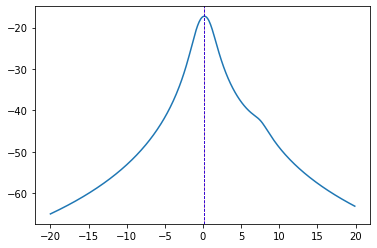

In [10]:
# optimize at initial value 0
initial_3b = np.array([0])
mle_NRe_3b = simplified_NRe_optimizer(initial_3b, cauchy_theta_1_score, cauchy_theta_1_expected_information, y_3b)
mle_NRo_3b = simplified_NRo_optimizer(initial_3b, cauchy_theta_1_score, cauchy_theta_1_hessian, y_3b)
print(mle_NRe_3b, mle_NRo_3b)

#plot
grid_3b = np.arange(-20, 20, 0.1)
log_likelihood_on_grid_3b = [cauchy_theta_1_log_likelihood([x], y_3b) for x in grid_3b]
plt.plot(grid_3b, log_likelihood_on_grid_3b)
plt.axvline(mle_NRe_3b, color="red", linestyle="dashed", linewidth=0.8)
plt.axvline(mle_NRo_3b, color="blue", linestyle="dashed", linewidth=0.8)
plt.show()

The above plot is the log-likelihiood function and the results of the optimization.
The red dashed line is the optimal point from newton method using expected Fisher information, and the blue dashed line is by using observed Fisher information.
Now, they overlap so closely.

Everything seems good.

### Q3-c

initial: [-1]  mle(e): [0.36237173]  mle(o): [0.36250768]
initial: [4.67]  mle(e): [5.04729864]  mle(o): [4.96009732]
initial: [10]  mle(e): [8.54586691]  mle(o): [8.93381297]


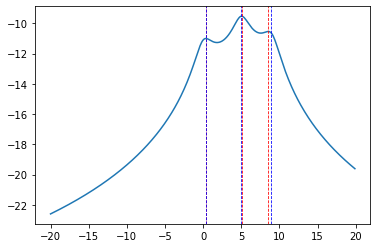

In [11]:
#problem 3c
y_3c = [0, 5, 9]
initial_3c_vec = [np.array([-1]), np.array([4.67]), np.array([10])]

grid_3c = np.arange(-20, 20, 0.1)
log_likelihood_on_grid_3c = [cauchy_theta_1_log_likelihood([x], y_3c) for x in grid_3c]
plt.plot(grid_3c, log_likelihood_on_grid_3c)

for initial_3c in initial_3c_vec: 
    mle_NRe_3c = simplified_NRe_optimizer(initial_3c, cauchy_theta_1_score, cauchy_theta_1_expected_information, y_3c)
    mle_NRo_3c = simplified_NRo_optimizer(initial_3c, cauchy_theta_1_score, cauchy_theta_1_hessian, y_3c)
    print("initial:", initial_3c, " mle(e):", mle_NRe_3c, " mle(o):", mle_NRo_3c)

    plt.axvline(mle_NRe_3c, color="red", linestyle="dashed", linewidth=0.8)
    plt.axvline(mle_NRo_3c, color="blue", linestyle="dashed", linewidth=0.8)

plt.show()

Again, the curve is the log-likelihiood function, the red dashed line is the optimal point from newton method using expected Fisher information, and the blue dashed line is by using observed Fisher information.

In this case, because multiple local maxima exist, results of the optimization algorithm highly depend on initial values.
Among three trials, only the time when we started with initial value 4.67 converges the global maximum.
It is one of the well-known limitations of many numerical optimization methods, including the Newton method.
Thus, we should take care when we use an algorithm guaranteeing only local optimization point, if we use the algorithm to non-convex or non-concave optimization problem.

## Q4
### Q4-a

[0.99599805 1.32660967] [0.99599805 1.32660967]


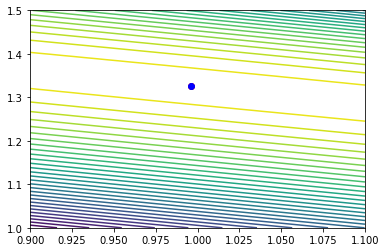

In [12]:
# problem 4: poisson glm
def pois_glm_log_likelihood(beta, data):
    beta1 = beta[0]
    beta2 = beta[1]

    lik = 0
    for (x, y) in data:
        lik += (y*(beta1+beta2*x)-np.exp(beta1+beta2*x)-sum([np.log(a) for a in range(1, y+1)]))
    return lik

def pois_glm_score(beta, data):
    beta1 = beta[0]
    beta2 = beta[1]

    score = np.array([0, 0], dtype='float64')
    for (x, y) in data:
        exp_term = np.exp(beta1+beta2*x)
        score += np.array([y-exp_term, x*y-x*exp_term])
    return score

def pois_glm_hessian(beta, data):
    beta1 = beta[0]
    beta2 = beta[1]
    hessian = np.array([[0,0],[0,0]], dtype='float64')
    for (x, y) in data:
        exp_term = np.exp(beta1+beta2*x)
        hessian -= (np.array([[1, x],
                            [x, x**2]])*exp_term)
    return hessian

def pois_glm_expected_information(beta, data):
    beta1 = beta[0]
    beta2 = beta[1]

    expected_info = np.array([[0,0],[0,0]], dtype='float64')
    for (x, _) in data:
        exp_term = np.exp(beta1+beta2*x)
        expected_info += (np.array([[1, x],
                                [x, (x**2)]])*exp_term)
    return expected_info

y_4 = [1, 6, 16, 23, 27, 39, 31, 30, 43, 51, 63, 70, 88, 97, 91, 104, 110, 113, 149, 159]
data_4 = [(np.log(i+1),y) for i, y in enumerate(y_4)]
initial_4 = np.array([10,1])# do not start [0, 0]
mle_NRe_4 = simplified_NRe_optimizer(initial_4, pois_glm_score, pois_glm_expected_information, data_4)
mle_NRo_4 = simplified_NRo_optimizer(initial_4, pois_glm_score, pois_glm_hessian, data_4)
print(mle_NRe_4, mle_NRo_4)


grid_1 = np.linspace(0.9, 1.1, 100)
grid_2 = np.linspace(1, 1.5, 100)
meshgrid_1, meshgrid_2 = np.meshgrid(grid_1, grid_2)
value_mat = np.zeros(meshgrid_1.shape)
for i in range(len(grid_1)):
    for j in range(len(grid_2)):
        value_mat[i,j] = pois_glm_log_likelihood([meshgrid_1[i,j], meshgrid_2[i,j]], data_4)
plt.contour(meshgrid_1, meshgrid_2, value_mat, levels=30)
plt.plot(mle_NRe_4[0],mle_NRe_4[1], 'ro')
plt.plot(mle_NRo_4[0],mle_NRo_4[1], 'bo')
plt.show()

Since expected fisher information and hessian matrix of log-likelihood are the exactly same up to minus sign,
both algorithms gave us the same result.
The mle of $\beta$ is around [0.996, 1.326]. The plot is the contour plot of log-likelihood, and blue dots indicates the optimum.

## Q4-b

```
[R code]

> x_4 = log(1:20)
> y_4 = c(1, 6, 16, 23, 27, 39, 31, 30, 43, 51, 63, 70, 88, 97, 91, 104, 110, 113, 149, 159)
> fit = glm(y_4~x_4, family=poisson)
> summary(fit)

Call:
glm(formula = y_4 ~ x_4, family = poisson)

Deviance Residuals:
    Min       1Q   Median       3Q      Max
-2.0568  -0.8302  -0.3072   0.9279   1.7310

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.99600    0.16971   5.869 4.39e-09 ***
x_4          1.32661    0.06463  20.525  < 2e-16 ***
---
Signif. codes:  0 '\*\*\*' 0.001 '\*\*' 0.01 '\*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 677.264  on 19  degrees of freedom
Residual deviance:  21.755  on 18  degrees of freedom
AIC: 138.05

Number of Fisher Scoring iterations: 4
```

By using 'glm' function in R, we got the same estimate with Q4-a. :D